
# Wektoryzacja obrazów za pomocą pretrenowanych modeli
![Architektura konwolucyjna](https://drive.google.com/uc?id=1a4idANzPJC2Jru-M5RlR8JZVNKVJcE-Y)

## Implementacja modelu ResNet ([publikacja](https://arxiv.org/abs/1512.03385))
- [Dokumentacja w HuggingFace](https://huggingface.co/docs/transformers/model_doc/resnet)
- [Wytrenowany wariant resnet-50 na zbiorze ImageNet](https://huggingface.co/microsoft/resnet-50)

In [2]:
!pip install --upgrade --no-cache-dir gdown

In [2]:
!gdown 1-v0QJ3tgdUUIzLr9p8KxWhn1GABo569f
!unzip /content/data.zip

Downloading...
From (original): https://drive.google.com/uc?id=1-v0QJ3tgdUUIzLr9p8KxWhn1GABo569f
From (redirected): https://drive.google.com/uc?id=1-v0QJ3tgdUUIzLr9p8KxWhn1GABo569f&confirm=t&uuid=7c834891-5d00-45b9-8358-d10b443dd4f8
To: /content/data.zip
100% 69.6M/69.6M [00:02<00:00, 30.0MB/s]
Archive:  /content/data.zip
   creating: data/
   creating: data/valid/
  inflating: data/valid/IMG_2424_jpeg_jpg.rf.16ecdfc5f663a44f0398b2dc270dc081.jpg  
  inflating: data/valid/IMG_2297_jpeg_jpg.rf.a7b46f3c112b1c319d824598ee1aafd5.jpg  
  inflating: data/valid/IMG_2404_jpeg_jpg.rf.62c50bcc4cc361b1356dd080a94d25c2.jpg  
  inflating: data/valid/IMG_8578_MOV-0_jpg.rf.259d80c0d67e3e88f2d04cd17df7f6a9.jpg  
  inflating: data/valid/IMG_3163_jpeg_jpg.rf.e18bd135c64490fe794c1d3c0087b5a2.jpg  
  inflating: data/valid/IMG_8535_MOV-5_jpg.rf.fe45012859267d87836726ec3fd4098f.jpg  
  inflating: data/valid/IMG_3153_jpeg_jpg.rf.bdb07feac6c2d6aaee9831d586876a82.jpg  
  inflating: data/valid/IMG_3150_jpeg_jpg.

In [3]:
from transformers import AutoImageProcessor, ResNetModel
import torch
from PIL import Image

model_name = 'microsoft/resnet-50'

image_processor = AutoImageProcessor.from_pretrained(model_name)
model = ResNetModel.from_pretrained(model_name)

image = Image.open("/content/data/test/IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg")
inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

In [4]:
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [5]:
outputs.pooler_output.shape

torch.Size([1, 2048, 1, 1])

In [6]:
outputs.last_hidden_state.shape

torch.Size([1, 2048, 7, 7])

In [7]:
inputs.keys()

dict_keys(['pixel_values'])

In [8]:
inputs['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [9]:
inputs.values()

dict_values([tensor([[[[-1.8782, -1.9124, -1.9295,  ..., -1.6555, -1.7069, -1.6727],
          [-1.8953, -1.9295, -1.9467,  ..., -1.6384, -1.7069, -1.7069],
          [-1.9124, -1.9467, -1.9638,  ..., -1.6727, -1.7069, -1.7412],
          ...,
          [-1.4500, -1.5185, -1.5528,  ..., -2.1008, -2.1179, -2.1179],
          [-1.5014, -1.5014, -1.5528,  ..., -2.1008, -2.1008, -2.1008],
          [-1.5014, -1.5014, -1.6213,  ..., -2.0665, -2.0665, -2.0665]],

         [[-1.7731, -1.8081, -1.8256,  ..., -1.4405, -1.4930, -1.4580],
          [-1.7731, -1.8256, -1.8431,  ..., -1.3880, -1.4580, -1.4580],
          [-1.8081, -1.8431, -1.8606,  ..., -1.4230, -1.4580, -1.4930],
          ...,
          [-1.2304, -1.3354, -1.3704,  ..., -1.9482, -1.9657, -1.9657],
          [-1.2654, -1.3179, -1.3704,  ..., -1.9832, -1.9832, -1.9832],
          [-1.2654, -1.3179, -1.4405,  ..., -1.9832, -1.9832, -1.9832]],

         [[-1.1944, -1.2293, -1.2467,  ..., -0.6193, -0.6715, -0.6541],
          [-1.211

In [10]:
image.size

(768, 1024)

# Zadanie: Similarity search engine

Wykorzystaj pretrenowany klasyfikatora obrazów z HuggingFace do wygenerowania embeddingów dla całego zbioru danych, a następnie porównaj je za pomocą odległości cosinusowej.

## Kroki Zadania

1. **Utwórz embeddingi dla całego zbioru danych:**
   - Utwórz funkcję `get_embedding(image_path: Union[str, Path])`, która przyjmuje ścieżkę do obrazu i zwraca jego embedding.
   - Przejdź przez wszystkie obrazy w katalogu `data/test` i utwórz embeddingi, przechowując je w numpy array.

2. **Porównywaj embeddingów za pomocą odległości cosinusowej:**
   - Wybierz jeden obrazek (`query_image`) z zestawu danych jako obraz do porównania.
   - Użyj funkcji `get_embedding` do uzyskania embeddingu dla tego obrazu.
   - Oblicz odległość kosinusową między embeddingiem `query_image` a każdym embeddingiem w `embeddings_array`.
   - Znajdź indeks embeddingu, który ma największą podobieństwo cosinusowe z `query_image`.
   - Wyświetl top 3 najbardziej podobnych obrazów do `query_image`.


In [12]:
import os
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Zdefiniuj funkcję do pobierania embeddingów dla danego obrazu
def get_embedding(image_path):
    image = Image.open(image_path)
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    embeddings = outputs.pooler_output.detach().numpy().ravel()
    return embeddings

# Zdefiniuj funkcję do obliczania odległości cosinusowej
def cosine_distance(embedding1, embedding2):
    return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0][0]

# Stwórz embeddingi dla całego zbioru danych
data_dir = "/content/data/test"
image_paths = [os.path.join(data_dir, image_name)
                for image_name in os.listdir(data_dir)
                if image_name.endswith(".jpg")]

embeddings = []
for image_path in tqdm(image_paths):
    embedding = get_embedding(image_path)
    embeddings.append(embedding)
embeddings_array = np.array(embeddings)

100%|██████████| 63/63 [00:20<00:00,  3.07it/s]


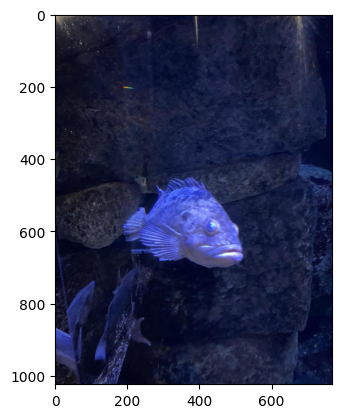

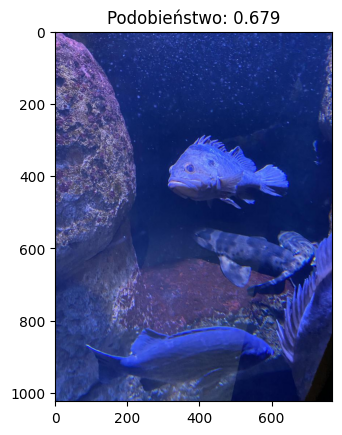

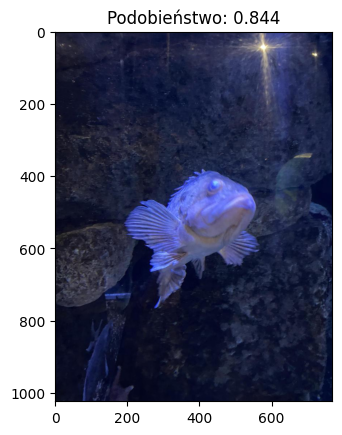

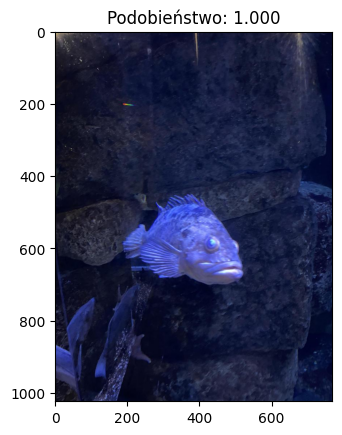

In [13]:
import matplotlib.pyplot as plt

# Wybierz jeden obrazek do porównania
query_image_path = "/content/data/test/IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg"
image = plt.imread(query_image_path)
plt.imshow(image)
# plt.show()

query_embedding = get_embedding(query_image_path)

# Znajdź top 3 najbardziej podobnych obrazków za pomocą odległości cosinusowej
similarities = [cosine_distance(query_embedding, emb) for emb in embeddings_array]
most_similar_indices = np.argsort(similarities)[-3:]

for index in most_similar_indices:
    image = plt.imread(image_paths[index])
    plt.figure()
    plt.imshow(image)
    plt.title(f"Podobieństwo: {similarities[index]:.3f}")

## Klastrowanie hierarchiczne z wykorzystaniem odległości cosinusowej

Aby znaleźć grupy podobnych obrazów, możemy wykorzystać klastrowanie hierarchiczne embeddingów na podstawie odległości cosinusowej.


In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(embeddings_array,
                          method='average',
                          metric='cosine')

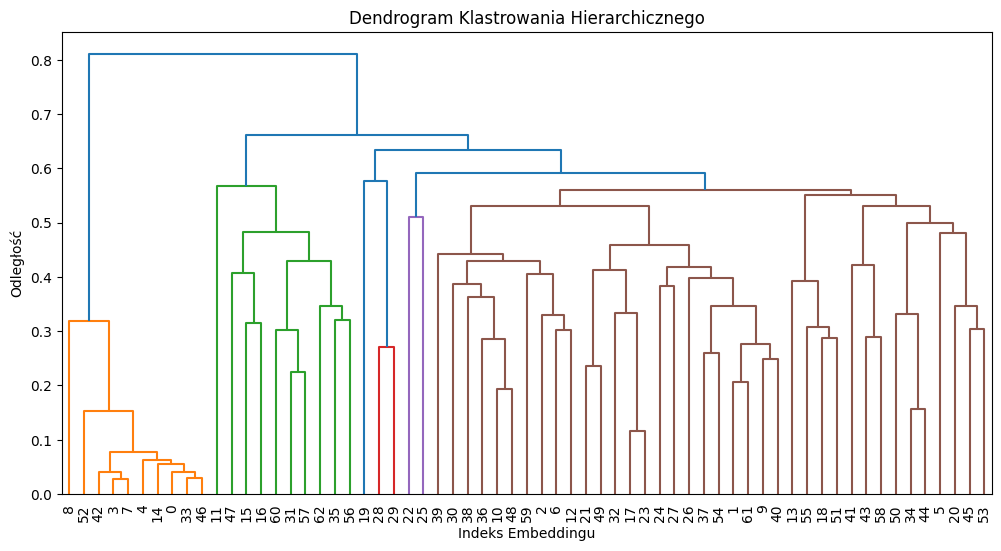

In [15]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=range(len(embeddings_array)), leaf_font_size=10)
plt.title('Dendrogram Klastrowania Hierarchicznego')
plt.xlabel('Indeks Embeddingu')
plt.ylabel('Odległość')
plt.show()

In [16]:
clustered_images = fcluster(linkage_matrix, t=0.5, criterion='distance')
clustered_images

array([ 1,  9,  8,  1,  1, 13,  8,  1,  1,  9,  8,  3,  8, 10,  1,  2,  2,
        9, 10,  5, 13,  9,  6,  9,  9,  7,  9,  9,  4,  4,  8,  2,  9,  1,
       12,  2,  8,  9,  8,  8,  9, 11,  1, 11, 12, 13,  1,  2,  8,  9, 12,
       10,  1, 13,  9, 10,  2,  2, 11,  8,  2,  9,  2], dtype=int32)

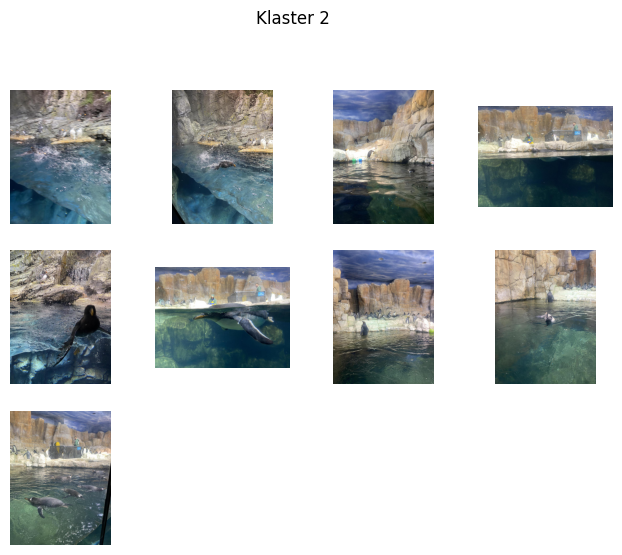

In [17]:
cluster_index = 2

cluster_indices = np.where(clustered_images == cluster_index)[0]

plt.figure(figsize=(8, 8))
for i, index in enumerate(cluster_indices):
    subplot_size = int(len(cluster_indices + 1)**0.5 + 1)
    plt.subplot(subplot_size, subplot_size, i+1)
    plt.imshow(np.array(Image.open(image_paths[index])))
    plt.axis('off')


plt.suptitle(f'Klaster {cluster_index}')
plt.show()
plt.close()

## Jak to robić w środowiskach produkcyjnych? Wektorowymi bazami danych.

### Przykład bazy danych: [MilvusDB](https://milvus.io/)


# Wykorzystanie ONNX na produkcji dla modeli Hugging Face
## Czym jest ONNX?
Open Neural Network Exchange (ONNX) to otwarty format do reprezentowania modeli uczenia maszynowego. Jest używany do przenośności modeli pomiędzy różnymi frameworkami do uczenia maszynowego, co umożliwia łatwe wdrożenie modeli w różnych środowiskach.

### Zalety ONNX:
-  Przenośność Modeli: Dzięki ONNX modele można przenosić między różnymi frameworkami (np. PyTorch, TensorFlow), co ułatwia korzystanie z tych modeli w różnych środowiskach.

- Łatwe Wdrażanie w Produkcji: ONNX pozwala na proste wdrożenie modeli w środowisku produkcyjnym, niezależnie od używanego frameworku.

- Optymalizacja Inferencji: ONNX obsługuje optymalizacje operacji inferencyjnych, co przyspiesza działanie modeli w środowisku produkcyjnym.

- Wsparcie Dla Różnych Platform: ONNX wspiera różne platformy, co umożliwia integrację modeli z różnymi systemami.

- Dostępne narzędzia do wizualizacji: https://netron.app/

## Konwersja modelu z Pytorch do ONNX

In [ ]:
%pip install transformers[onnx]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 957.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

In [19]:
inputs.keys()

dict_keys(['pixel_values'])

In [4]:
import torch
from transformers import AutoTokenizer, ResNetModel, AutoImageProcessor

model_name = 'microsoft/resnet-50'

image_processor = AutoImageProcessor.from_pretrained(model_name)
model = ResNetModel.from_pretrained(model_name)

inputs = image_processor(image, return_tensors="pt")


model.eval()

outputs = model(inputs['pixel_values'])

torch.onnx.export(
    model,
    tuple(inputs.values()),
    f="torch-model.onnx",
    input_names=['pixel_values'],
    output_names=['pooler_output', 'last_hidden_state'],
    dynamic_axes=
    {
        'pixel_values':
        {
            0: 'batch_size',
        },
        'pooler_output':
        {
            0: 'batch_size',
        },
        'last_hidden_state':
        {
            0: 'batch_size',
        }
    },
    do_constant_folding=True,
    opset_version=13,
)

/usr/local/lib/python3.10/dist-packages/transformers/models/resnet/modeling_resnet.py:90: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if num_channels != self.num_channels:


## Uruchomienie modelu w formacie ONNX

In [5]:
!pip install onnxruntime

In [6]:
import onnxruntime
import numpy as np

onnx_sess = onnxruntime.InferenceSession("torch-model.onnx")

onnx_inputs = {onnx_sess.get_inputs()[0].name: np.array(inputs['pixel_values'])}

onnx_outputs = onnx_sess.run(None, onnx_inputs)

print(onnx_outputs)

[array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.

In [7]:
onnx_sess.get_inputs()[0].name

'pixel_values'

In [8]:
len(onnx_outputs)

2

In [9]:
onnx_outputs[1]

array([[[[0.05198961]],

        [[0.01348179]],

        [[0.        ]],

        ...,

        [[0.        ]],

        [[0.05009796]],

        [[0.        ]]]], dtype=float32)

In [10]:
outputs.pooler_output.detach().numpy()

array([[[[0.05198943]],

        [[0.01348158]],

        [[0.        ]],

        ...,

        [[0.        ]],

        [[0.05009805]],

        [[0.        ]]]], dtype=float32)

In [11]:
np.allclose(outputs.pooler_output.detach().numpy(), onnx_outputs[1], atol=1e-4)

True

In [12]:
%%timeit

onnx_outputs = onnx_sess.run(None, onnx_inputs)

170 ms ± 31.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%%timeit

outputs = model(inputs['pixel_values'])

265 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
